# Proyecto final:  Deteccion de Fraude Bancario


In [89]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [4]:
# importamos el dataset
# fuente: https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction?resource=download

df = pd.read_csv('Fraud.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


step - mapea una unidad de tiempo en el mundo real. En este caso 1 paso es 1 hora de tiempo. Pasos totales 744 (simulación de 31 días).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

amount - monto de la transacción en moneda local.

nameOrig - cliente que inició la transacción

oldbalanceOrg - saldo inicial antes de la transacción

newbalanceOrig - nuevo saldo después de la transacción

nameDest - cliente que es el destinatario de la transacción

oldbalanceDest: destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

newbalanceDest - destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

isFraud: estas son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrando del sistema.

isFlaggedFraud: el modelo comercial tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.

## 1. Análisis Exploratorio 

Tamaño del dataset

In [5]:
print(df.shape)


(6362620, 11)


Informacion acerca del tipo de datos 

In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         bool   
 10  isFlaggedFraud  bool   
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 449.0+ MB


Veamos que no haya valores nulos

In [7]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Vemos que tampoco tenemos NaN´s

In [8]:
df.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [69]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [70]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
# Vamos a explorar los descriptores con los que contamos
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

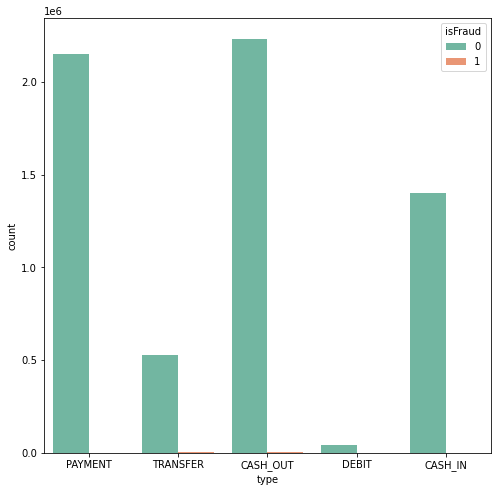

In [92]:
# counting the number of transactions per type
plt.figure(figsize=(8,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2");

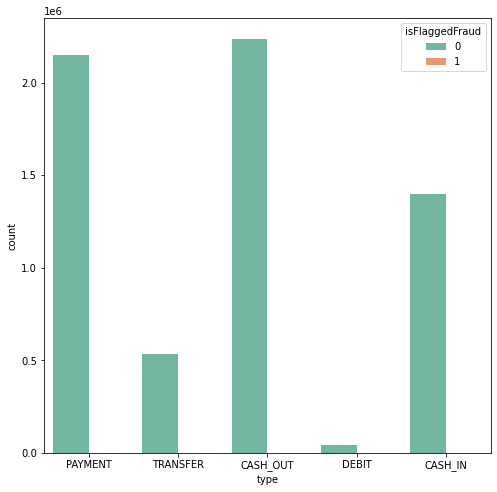

In [93]:
# counting the number of transactions per type
plt.figure(figsize=(8,8))
sns.countplot(x="type", data=df,hue="isFlaggedFraud" , palette="Set2");

In [45]:
df_payment= df[df.type == 'PAYMENT']
df_payment.shape


(2151495, 11)

In [46]:
df_debit = df[df.type == 'DEBIT']
df_debit.shape

(41432, 11)

In [50]:
df_cash_in = df[df.type == 'CASH_IN']
df_cash_in.shape

(1399284, 11)

In [51]:
df_cash_out = df[df.type == 'CASH_OUT']
df_cash_out.shape

(2237500, 11)

In [49]:
df_transfer = df[df.type == 'TRANSFER']
df_transfer.shape

(532909, 11)

## Regresion Logística

Sustituimos por numeros a los elementos de la variable 'type'

In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [192]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,True,False
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,True,False
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False


Eliminamos algunas columnas que no necesitamos y definimos nuestro conjunto de prueba y entrenamiento

In [220]:
from sklearn.model_selection import train_test_split

X = df.drop(['step','isFlaggedFraud',"isFraud","nameOrig", "nameDest"],axis=1).values
y = df["isFraud"].values

# dividimos el conjuntos de prueba y entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2022)

Estandarizamos a nuestros nuestros datos

In [226]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Definimos la clase regresion logística y entrenamos el modelo.

In [228]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)


Revisamos la exactitud del modelo 

In [248]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print()

# Genera los TP, TN, FP, y FN
(TN, FP, FN, TP) = matriz_confusion.ravel()

print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))


[[2541580     142]
 [   1993    1333]]

True positives: 1333
True negatives: 2541580
False positives: 142
False negative: 1993


In [242]:
def Accuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def Sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def Especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

acc = Accuracy(TP, TN, FP, FN)
sen = Sensibilidad(TP, TN, FP, FN)
spec = Especificidad(TP, TN, FP, FN)
print(f'Exactitud {Accuracy(TP, TN, FP, FN)}%')
print(f'Sensibilidad {Sensibilidad(TP, TN, FP, FN)}%')
print(f'Especificidad {Especificidad(TP, TN, FP, FN)}%')

Exactitud 99.91611160182441%
Sensibilidad 40.07817197835237%
Especificidad 99.99441323638068%


### Curva ROC/AUC

Calculamos los siguientes resultados probabilisticos. 

El primer valor es la probabilidad de que el valor sea negativo. 

El segundo valor es la probabilidad de que el valor sea positivo. 



In [238]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba[:10,:]

array([[9.99993544e-01, 6.45646614e-06],
       [9.99513712e-01, 4.86288446e-04],
       [9.99927879e-01, 7.21209607e-05],
       [9.99060128e-01, 9.39872448e-04],
       [9.99342285e-01, 6.57715093e-04],
       [9.99453430e-01, 5.46570274e-04],
       [9.99061274e-01, 9.38725509e-04],
       [9.99222947e-01, 7.77053225e-04],
       [9.99675383e-01, 3.24617154e-04],
       [9.99004808e-01, 9.95191838e-04]])

<Figure size 720x720 with 0 Axes>

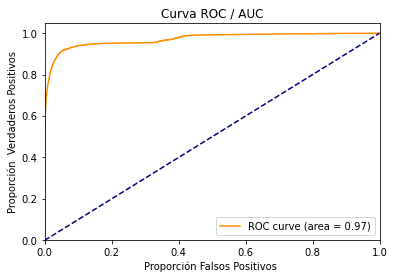

In [245]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Falsos Positivos ')
plt.ylabel('Proporción  Verdaderos Positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como el area es cercana a 1, podemos concluir que el modelo es muy bueno para diferenciar entre transacciones fradulentos y no fraudulentas. Además, es muy probable que elija la opción correcta.